# ArcheWriting

Documentation process for the project started at the New Material Imaginaries class.

## Load data from [Pandemic Archive of Voices](https://github.com/mneunomne/pandemic-archive-of-voices-DB)

In [80]:
import requests
import json

r = requests.get('https://pandemic-archive-of-voices.herokuapp.com/api/data')

db_data = json.loads(r.text)
audios = db_data['audios']
print(db_data)

{'db': 'The Pandemic Archive of Voices', 'extracted_on': '2021-01-2319:21:50', 'audios_length': 183, 'speakers_length': 24, 'total_duration_seconds': 314, 'audios': [{'from': 'Alberto Harres', 'file': 'db/audios/5631317686/audio_1@15-12-2020_14-57-52.wav', 'id': 13, 'text': 'Números', 'from_id': 5631317686, 'duration_seconds': 3, 'lang': {'name': 'brazilian portuguese', 'code': 'pt-br', 'standard': 'ISO 639-1'}}, {'from': 'nilya musaeva*️⃣', 'file': 'db/audios/4472772915/audio_2@15-12-2020_14-58-37.wav', 'id': 15, 'text': 'еда', 'from_id': 4472772915, 'duration_seconds': 1, 'lang': {'name': 'russian', 'code': 'ru', 'standard': 'ISO 639-1'}}, {'from': 'S. C.', 'file': 'db/audios/4408865338/audio_3@15-12-2020_16-21-06.wav', 'id': 22, 'text': '', 'from_id': 4408865338, 'duration_seconds': 3, 'lang': {'name': 'mandarin chinese', 'code': 'cmn', 'standard': 'ISO 639-3'}}, {'from': 'ruoxi', 'file': 'db/audios/5631317686/audio_4@15-12-2020_16-31-05.wav', 'id': 27, 'text': '怪迷日眼', 'from_id': 51

## Reading audio data

- Get random audio from the archive.
- Convert it to 8bit audio with 8000hz Sample Rate
- Save the data and plot it

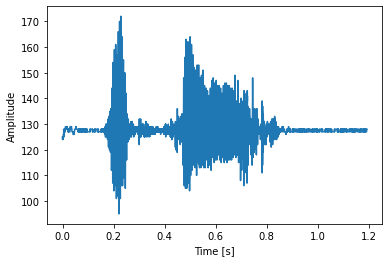

8000 [125 124 125 ... 128 128 128]


In [49]:
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
db_url = 'https://pandemic-archive-of-voices.herokuapp.com/'

# pick random auido fomr database
audio_data = np.random.choice(audios, size=1)[0]

# download file from database and save it temporarily
r = requests.get(db_url + audio_data['file'], allow_redirects=True)
filename = audio_data['file'].split('/')[3]
open(filename, 'wb').write(r.content)

# Run ffmpeg to convert audio to 8bit 8000hz sample rate
os.system('ffmpeg -i ' + filename + ' -ar 8000 -ac 1 -acodec pcm_u8 output.wav')

## load converted file data
samplerate, data = wavfile.read('output.wav')

# plot audio data
length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

# delete downloaded file
os.remove(filename)

# print(samplerate, data)
#file_path = db_url + audio_data['file']


### Visualize audio data as image data

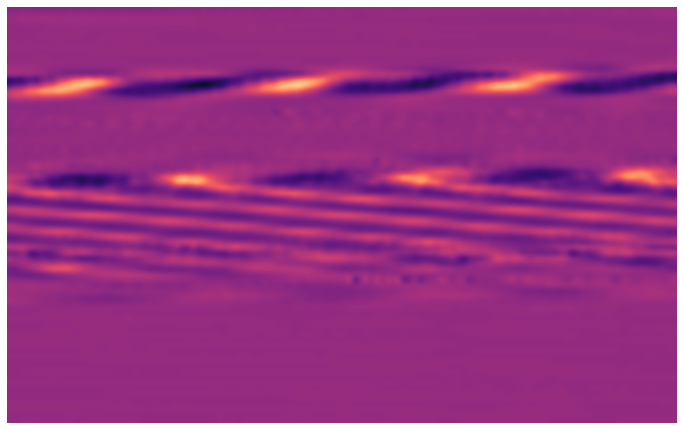

In [50]:
from matplotlib import colors
from matplotlib import figure
import math

# set size of plot
fig = plt.figure(figsize = (12,12))

# find middle divisor of the array data
numbers = []
for i in range(1, len(data) + 1):
  if len(data) % i == 0:
    numbers.append(i)
divisor = numbers[math.ceil(len(numbers) / 2)]

# transform array data into a "rectangle"
grid_values = np.reshape(data, (-1, divisor))

plt.axis('off')
img = plt.imshow(grid_values, interpolation='bicubic', cmap = 'magma')

## Create Alphabet

Creating array of characters to be used when transforming the 8bit data into a Unicode character.


In [2]:
texts = ""
for i in audios:
    texts = texts + i['text']
print(texts)

Númerosеда怪迷日眼Ensimesmado造孽巴撒遇球得到ロックダウン非常事態宣言20秒間三密Zoom会議コロナに効く！コロナに負けないコロナ下閉店しましたこんなご時世ですがまた会う日までकोरोनाको समय, एक्लोपन अनि असहजतासंवेदनशील मानव जीवनबाध्यताSirenesRespiradoresEsperançaAlemãoсистема цифровых пропусков宅健康码第一波第二波第三波第四波코로나 감염병 확산확진자가짜뉴스와 음모론격리시설가짜뉴스와 음모론Protocolos de distanciamento socialIncertezasMinutos de silênciodog's dinnerextended support bubbleMáscarazigue-zagueнадоелоnedostajanjevremebliskostdaljinaograničenostসবাই ভালো থেকোLutoDistanciaIntrospecciónAmistadesCercaniaNostalgiachurch bells and sirenspandemoniumমন মরা ভাবhamsternvereinsamenKırlangıçHuzurTesadüfAfilliSerzenişSadakatMasumMasumiyetAşkAnsızın封關呀仆街帶口罩呀屌你老母Falta de arsolidãoermoO MundoСалідарнасцьРэвалюцыяСупольнасць恍儿胡兮哭兮来呆عزلةتضامنحنينواقعحياةخيالانتظارتغييرBunaltıBeynelmilelFütursuzBelirsizlikMuallakYeni gerçeklik囊个嫩个列个安ProvocaçõesSZFE-tüntetésOperatív törzsBicikliút a körútonSzeparáltságA szituáció kihasználásaestranguladodesbotadodestituídoদেখা যাক কি হয়自粛警察俺はまだいいけど一億総引きこもり俺もともと引きこもりだし実はドッキリでした茶番感クリスマ

In [54]:
import random

def split(word):
    return [char for char in word]

characters = split(texts)

unique_characters = [i for j, i in enumerate(characters) if i not in characters[:j]] 
random.shuffle(unique_characters)
random.shuffle(characters)

with open('unique-characters.json', 'w') as f:
    json.dump(unique_characters, f)

print(unique_characters)

['п', '在', "'", 'ध', 'ペ', '作', 'अ', 'v', 'н', 'n', '介', '코', 'ü', 'ض', 'া', 'ド', '第', 'о', 'ь', 'د', '秒', '়', 'ं', 'দ', 'z', 'হ', 'в', '兮', 'い', 'd', '店', '仆', 'に', 'め', 'č', '口', 'ン', '孽', 'で', '球', '码', '짜', '切', '康', '健', 'す', 'j', '老', 'S', '2', '品', '呼', '做', '迷', '0', 'х', '宅', 'A', 'ই', 'ह', 'س', '察', 'な', '乜', 'ص', 'テ', '粛', '安', 'F', '怪', '封', '警', '巴', 'b', '्', 'C', '４', '得', 'á', '時', 'k', 'け', 'ビ', '！', 'と', 'ご', 'ظ', 'ا', '론', '密', 'Y', '-', '시', '呆', 'त', '리', 'П', ',', 'L', 'ク', '嫩', 'ォ', '확', 'u', 'れ', '桜', 'б', 'て', '胡', 'f', 'Х', 'я', '뉴', 'خ', 'ゼ', 'م', 'й', 'は', '帶', '媒', 'ل', '負', '剪', 'í', '진', 'А', 'ö', 'ん', 'ョ', 'õ', 'フ', '閉', 'ノ', 'ó', 'র', 'ы', 'گ', 'O', 'ि', 'ع', '事', 'w', 'ন', '占', 'N', 'ã', '个', 'ष', 'व', '卖', 'a', '屌', '入', '体', 'غ', '始', 'p', ' ', 'ब', 'ズ', 'i', '關', 'う', 'x', 'у', 'く', 'P', '会', 'े', 'খ', 'य', '撒', 'э', 'こ', 'イ', 'ー', 'ো', 'ر', 'ة', '罩', '头', '산', 'り', 'ю', '呀', 'e', 'و', '年', 'е', 'ب', '감', 'ज', 'ı', 'ه', 'レ', 'а', '遇', 'バ', 'た', 'I',

### Create SVG text grid with audio data

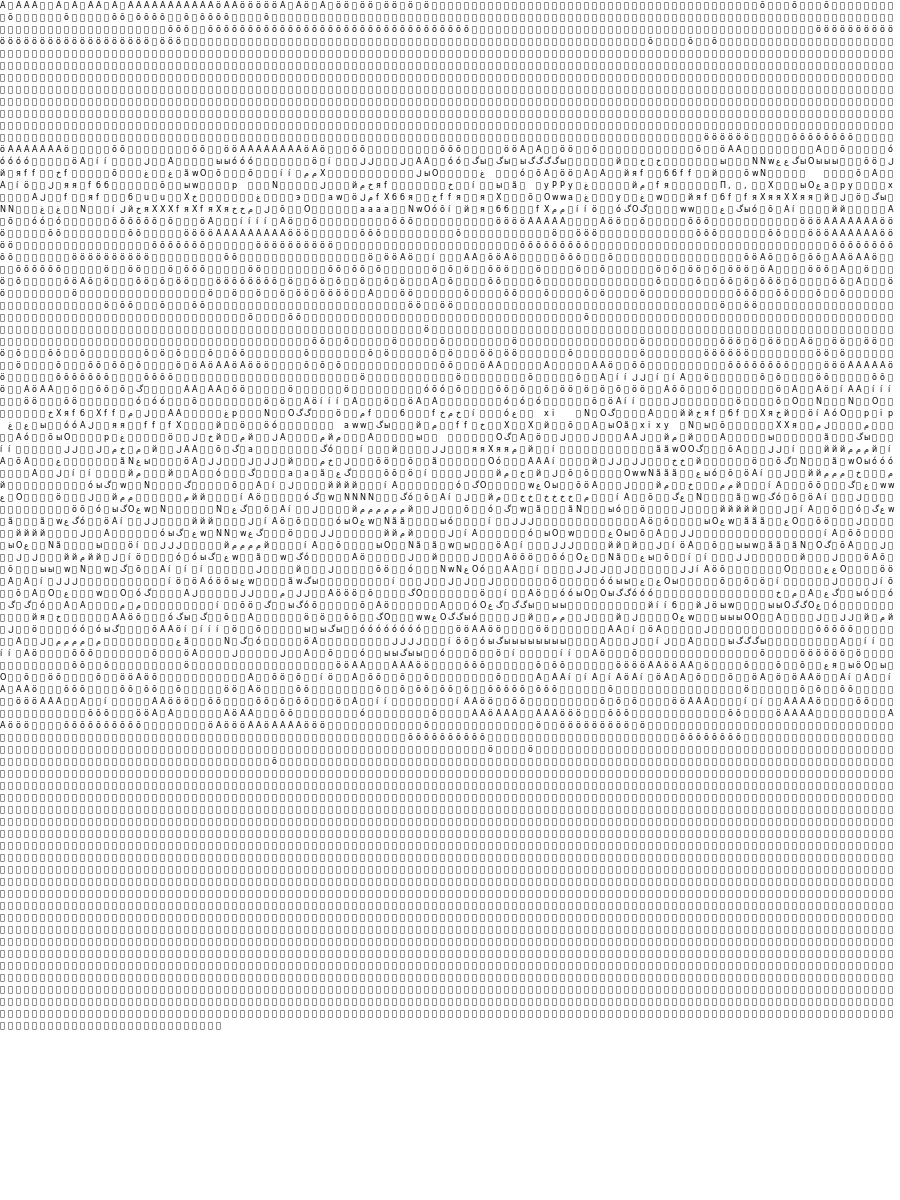

In [58]:
import drawSvg as draw

width=450
height=600
d = draw.Drawing(width, height)

# Draw text

fontSize = 4
fontWidth = fontSize - 1
x=0
y=height-fontSize
i=0

for i in data:
    character = unique_characters[i]
    d.append(draw.Text(character, fontSize, x, y))  # Text with font size 8
    x = x + fontSize
    if x > width-fontSize:
        i = 0
        x = 0
        y = y - (fontSize + 2)

d.setPixelScale(2)  # Set number of pixels per geometry unit
# Display in Jupyter notebook
d.rasterize()  # Display as PNG
d  # Display as SVG

# d.saveSvg('ArcheWriting.svg')